# Beer Recommendation System using Collaborative Filtering Technique

## Group 5

#### **Dataset used:** Multi aspect ratings

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from numpy.linalg import norm
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

## Data Analysis

In [3]:
beeradvocate1=pd.read_csv("D:/Recommender System Datasets/RS_Project_2/beeradvocate.csv")

In [4]:
beeradvocate1.rename(columns = {'beer/brewerId':'brewerId','Unnamed: 0':'purchase','beer/beerId':'beerId', 'beer/name':'beer_name','beer/ABV':'ABV','beer/style':'beer_style','review/appearance':'appearance','review/aroma':'aroma','review/palate':'palate','review/taste':'taste','review/overall':'overall','review/time':'time','review/profileName':'user','review/text':'text'}, inplace = True) 

beeradvocate1.head()


,purchase,beer_name,beerId,brewerId,ABV,beer_style,appearance,aroma,palate,taste,overall,time,user,text
0,0,Sausa Weizen,47986.0,10325.0,5.0,Hefeweizen,2.5,2.0,1.5,1.5,1.5,1.234818e+09,stcules,A lot of foam. But a lot.\tIn the smell some b...
1,1,Red Moon,48213.0,10325.0,6.2,English Strong Ale,3.0,2.5,3.0,3.0,3.0,1.235915e+09,stcules,"Dark red color, light beige foam, average.\tIn..."
2,2,Black Horse Black Beer,48215.0,10325.0,6.5,Foreign / Export Stout,3.0,2.5,3.0,3.0,3.0,1.235917e+09,stcules,"Almost totally black. Beige foam, quite compac..."
3,3,Sausa Pils,47969.0,10325.0,5.0,German Pilsener,3.5,3.0,2.5,3.0,3.0,1.234725e+09,stcules,"Golden yellow color. White, compact foam, quit..."
4,4,Cauldron DIPA,64883.0,1075.0,7.7,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,1.293735e+09,johnmichaelsen,"According to the website, the style for the Ca..."


In [5]:
beeradvocate1.isnull().sum()

purchase          0
beer_name         1
beerId            1
brewerId          1
ABV           67786
beer_style        1
appearance        1
aroma             1
palate            1
taste             1
overall           1
time              1
user            349
text            354
dtype: int64

In [6]:
null_mask = beeradvocate1['user'].isnull()
null_rows = beeradvocate1[null_mask]

print(null_rows.shape)
beeradvocate1.dropna(subset=['user'], inplace=True)

(349, 14)


In [7]:
beeradvocate1.isnull().sum()

purchase          0
beer_name         0
beerId            0
brewerId          0
ABV           67773
beer_style        0
appearance        0
aroma             0
palate            0
taste             0
overall           0
time              0
user              0
text            353
dtype: int64

In [8]:
beer_train, beer_test = train_test_split(beeradvocate1, test_size=0.2, random_state=42)

In [9]:
beeradvocate=beer_train[:100000]

In [10]:
beeradvocate.head()

,purchase,beer_name,beerId,brewerId,ABV,beer_style,appearance,aroma,palate,taste,overall,time,user,text
65870,65870,Ybor Gold Brown Ale,278.0,161.0,4.4,English Brown Ale,4.0,3.5,3.0,4.0,4.0,1.151194e+09,porter17,"At pouring, it filled the glass with a nice he..."
246127,246127,Ramstein Winter Wheat,2743.0,607.0,9.5,Weizenbock,3.5,3.5,3.5,3.0,3.0,1.140487e+09,Prufrock,12 oz. bottle into a pilsner.\t\tpitch brown w...
1411040,1411040,Young's Special London Ale,724.0,664.0,6.4,Extra Special / Strong Bitter (ESB),3.5,4.0,4.0,4.0,4.0,1.252322e+09,JohnfromDublin,I bought a 500ml bottle of this in Molloy's Du...
101156,101156,Ravnsborg Rød,23098.0,8264.0,5.5,American Amber / Red Ale,3.0,3.0,2.5,3.0,3.0,1.317060e+09,Phyl21ca,Bottle: Poured a clear amber color ale with a ...
692445,692445,Weihenstephaner Hefeweissbier,731.0,252.0,5.4,Hefeweizen,4.5,4.0,4.0,4.5,4.0,1.297345e+09,SFrankBrew,Really good beer. Obviously it's a 100 years o...


In [11]:
beeradvocate[beeradvocate['user'] == 'stcules'].head()

,purchase,beer_name,beerId,brewerId,ABV,beer_style,appearance,aroma,palate,taste,overall,time,user,text
1371133,1371133,Lvivske 1715,23637.0,10430.0,4.0,Euro Pale Lager,2.0,1.5,1.5,1.5,2.0,1.194031e+09,stcules,"It's a golden, with a lot of bubbles. Average ..."
951447,951447,Blanche De Namur,6057.0,805.0,4.5,Witbier,3.5,3.5,2.5,3.5,3.5,1.109019e+09,stcules,"Classic color, hazy white (with the yeast; wit..."
1288929,1288929,Spandauer Havelbräu Hell,43831.0,2860.0,5.2,Keller Bier / Zwickel Bier,3.0,2.5,2.5,3.0,3.0,1.271876e+09,stcules,"Beer-yellow turbid and opalescent. White foam,..."
533736,533736,Lamme Goedzak,15572.0,552.0,7.0,Belgian Strong Pale Ale,4.0,4.0,3.5,3.0,3.5,1.075052e+09,stcules,"Dark golden colour, with a discrete foam, whit..."
569116,569116,Dark Strong Ale,39463.0,15942.0,7.5,Belgian Strong Dark Ale,3.5,2.0,2.0,2.0,2.0,1.194177e+09,stcules,"Light brown colored, with a beige head, abunda..."


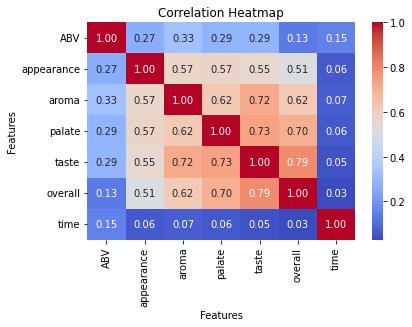

In [51]:
import seaborn as sns
numeric_columns = ['ABV', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'time']
df_numeric = beeradvocate[numeric_columns]

corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Matrix Factorization

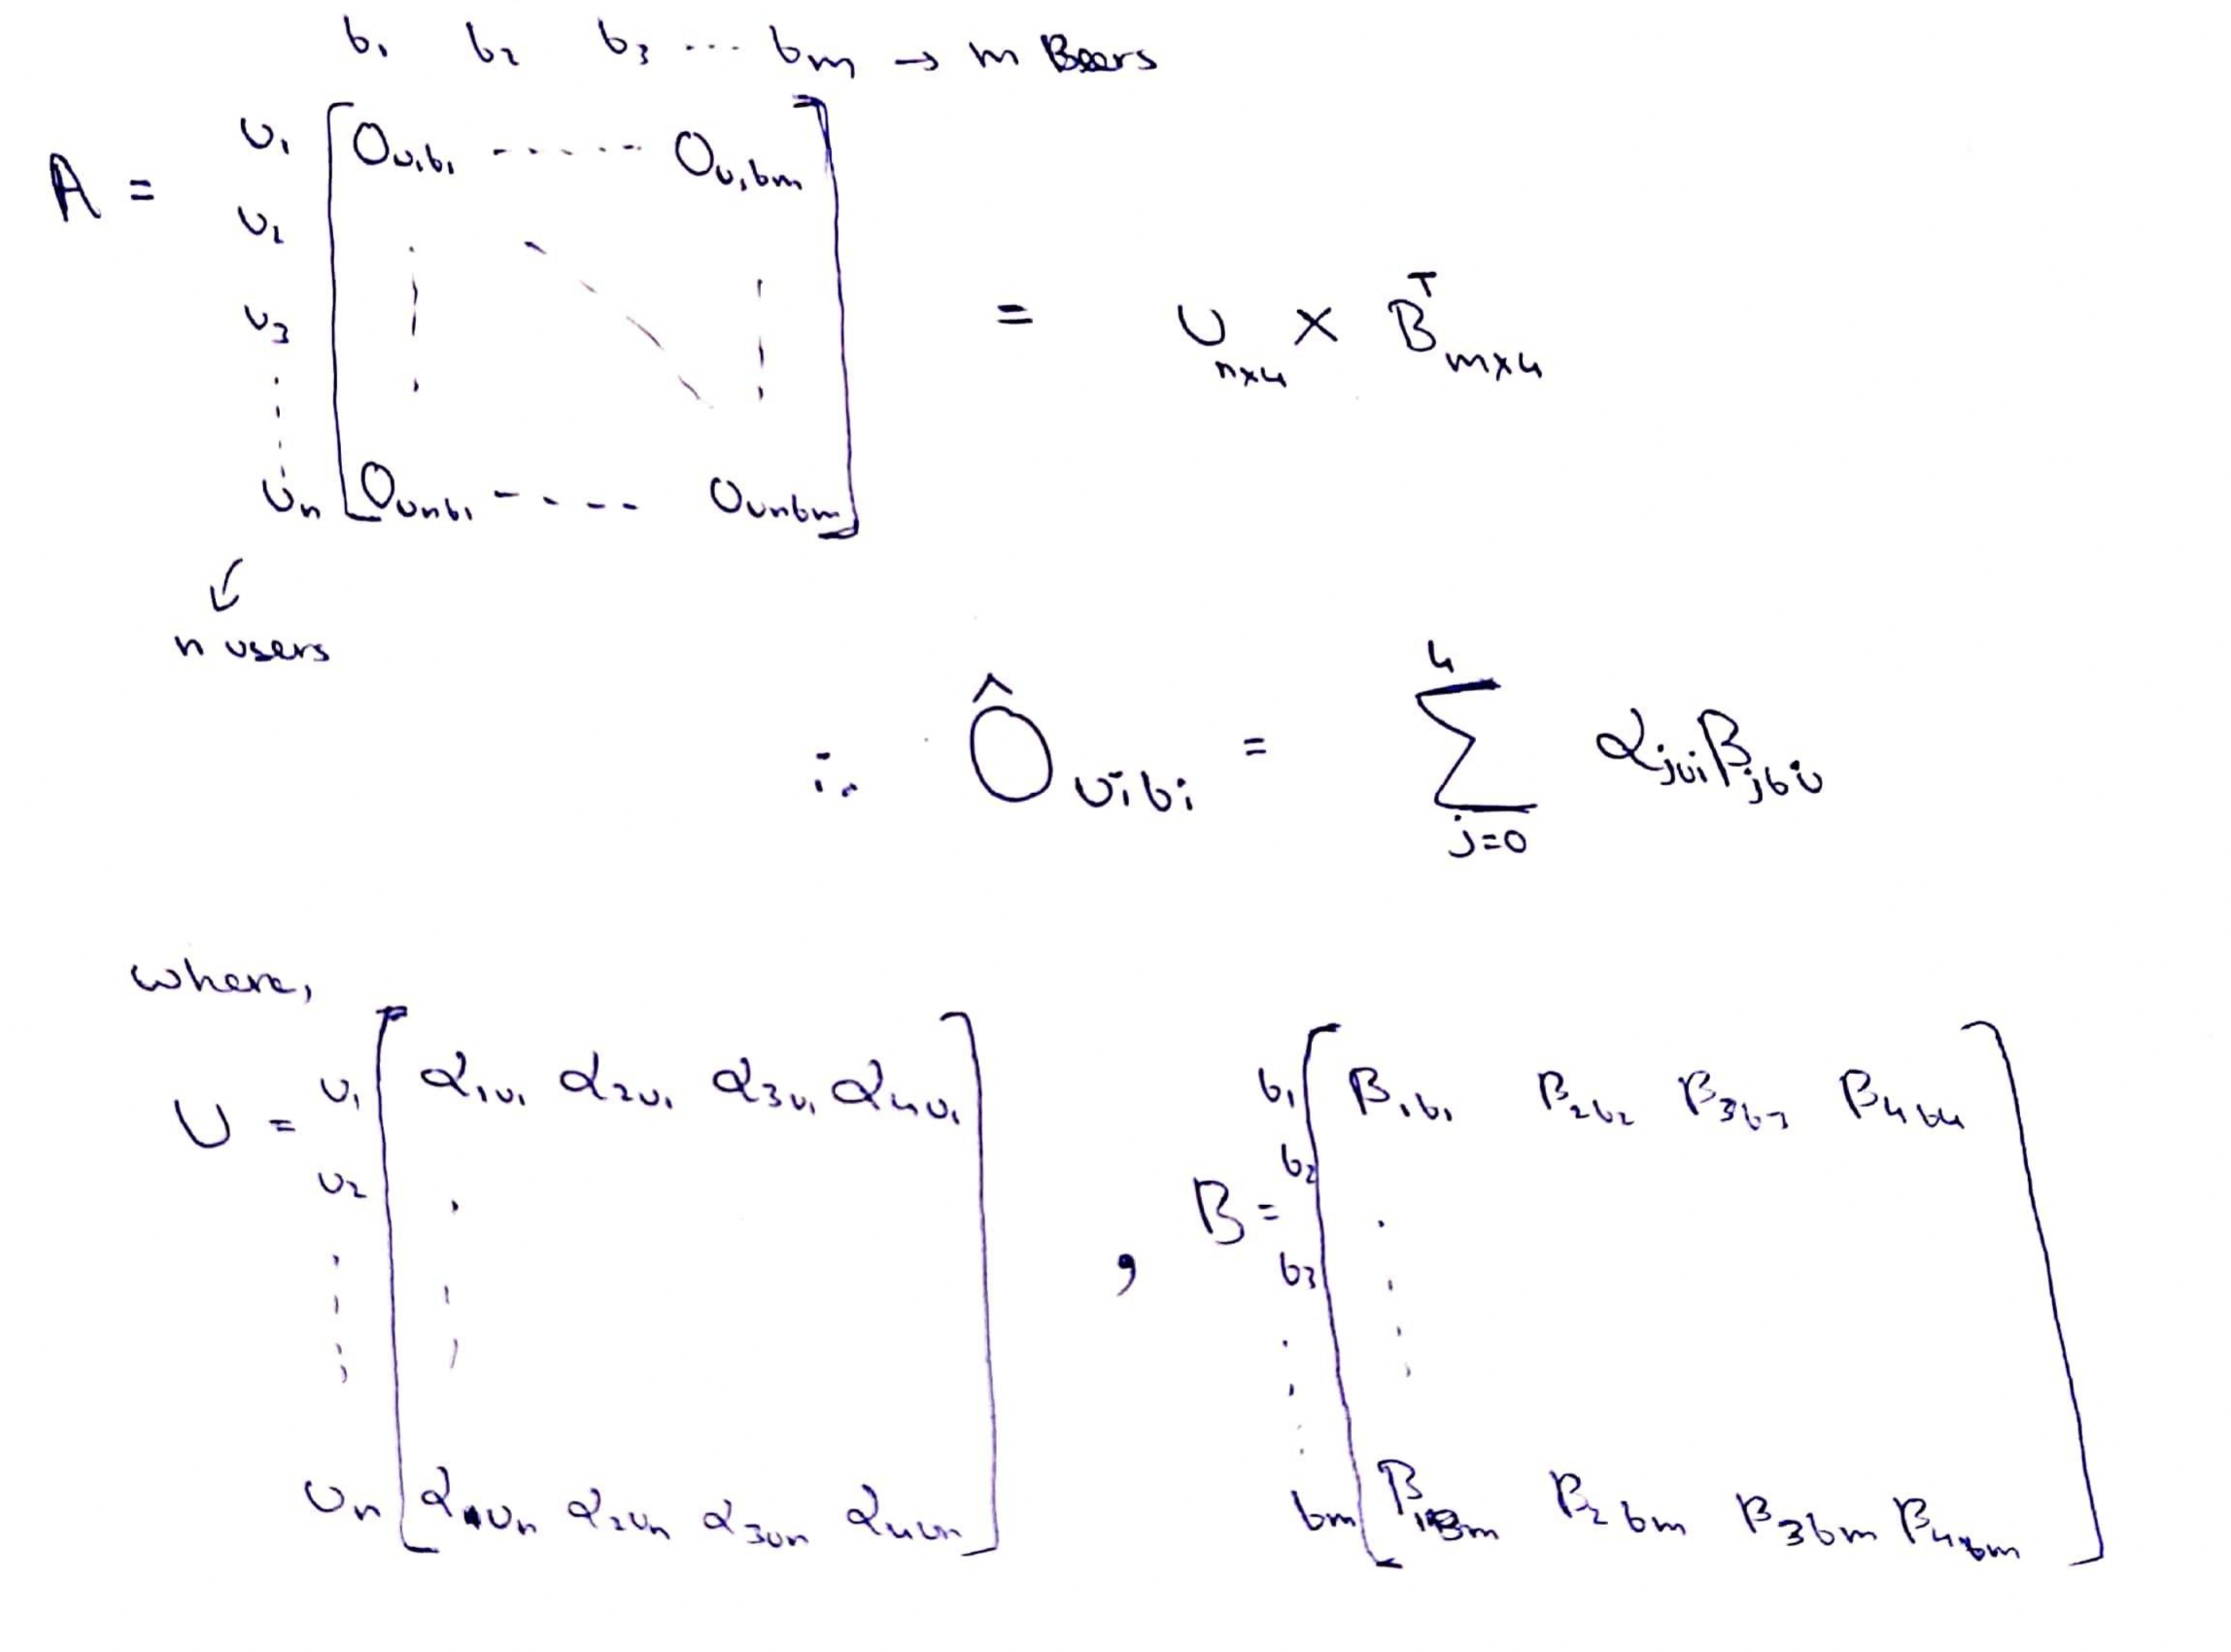

In [12]:
def user_ratings(user):
    df = beeradvocate[beeradvocate['user']==user][['appearance','aroma','palate','taste']]
    b = beeradvocate[beeradvocate['user']==user][['overall']]
    av = df.mean().tolist()
    return df, b, av

In [13]:
df, b, av = user_ratings('stcules')

In [14]:
b

,overall
1371133,2.0
951447,3.5
1288929,3.0
533736,3.5
569116,2.0
...,...
1538031,4.0
960161,2.5
1346873,4.0
737730,1.5


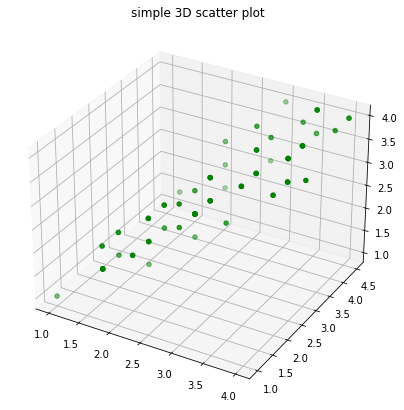

In [15]:
# Creating dataset
user = 'stcules'
z = beeradvocate[beeradvocate['user']==user][['taste']]
x = beeradvocate[beeradvocate['user']==user][['palate']]
y = beeradvocate[beeradvocate['user']==user][['overall']]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [16]:
alpha = np.linalg.lstsq(df, b, rcond=None)[0]
print(alpha)

[[-0.01754133]
 [ 0.22925833]
 [ 0.21239456]
 [ 0.65069084]]


In [17]:
def beer_ratings(beer):
    df = beeradvocate[beeradvocate['beer_name']==beer][['appearance','aroma','palate','taste']]
    b = beeradvocate[beeradvocate['beer_name']==beer][['overall']]
    av = df.mean().tolist()
    return df, b, av

In [18]:
beer = 'Kölsch'
df_beer, b_beer, av = beer_ratings(beer)

In [19]:
df_beer

,appearance,aroma,palate,taste
914166,3.0,3.0,3.0,3.0
161992,3.5,3.5,3.5,4.0
161975,3.0,3.0,4.0,4.0
161993,3.5,3.5,3.5,4.0
1154717,4.0,4.0,4.0,4.0
161977,4.0,4.0,4.0,4.0
161983,3.0,3.0,3.5,4.0
336759,3.0,3.5,4.0,3.5
161963,3.5,3.0,3.5,3.5
161973,4.0,4.0,4.0,4.0


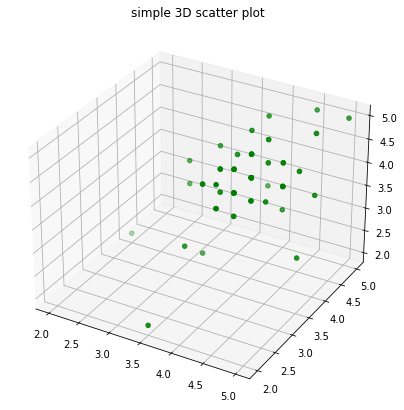

In [20]:
# Creating dataset
beer = 'Maximus'
z = beeradvocate[beeradvocate['beer_name']==beer][['aroma']]
x = beeradvocate[beeradvocate['beer_name']==beer][['appearance']]
y = beeradvocate[beeradvocate['beer_name']==beer][['overall']]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

### Computation of User Matrix using Least Squares Method

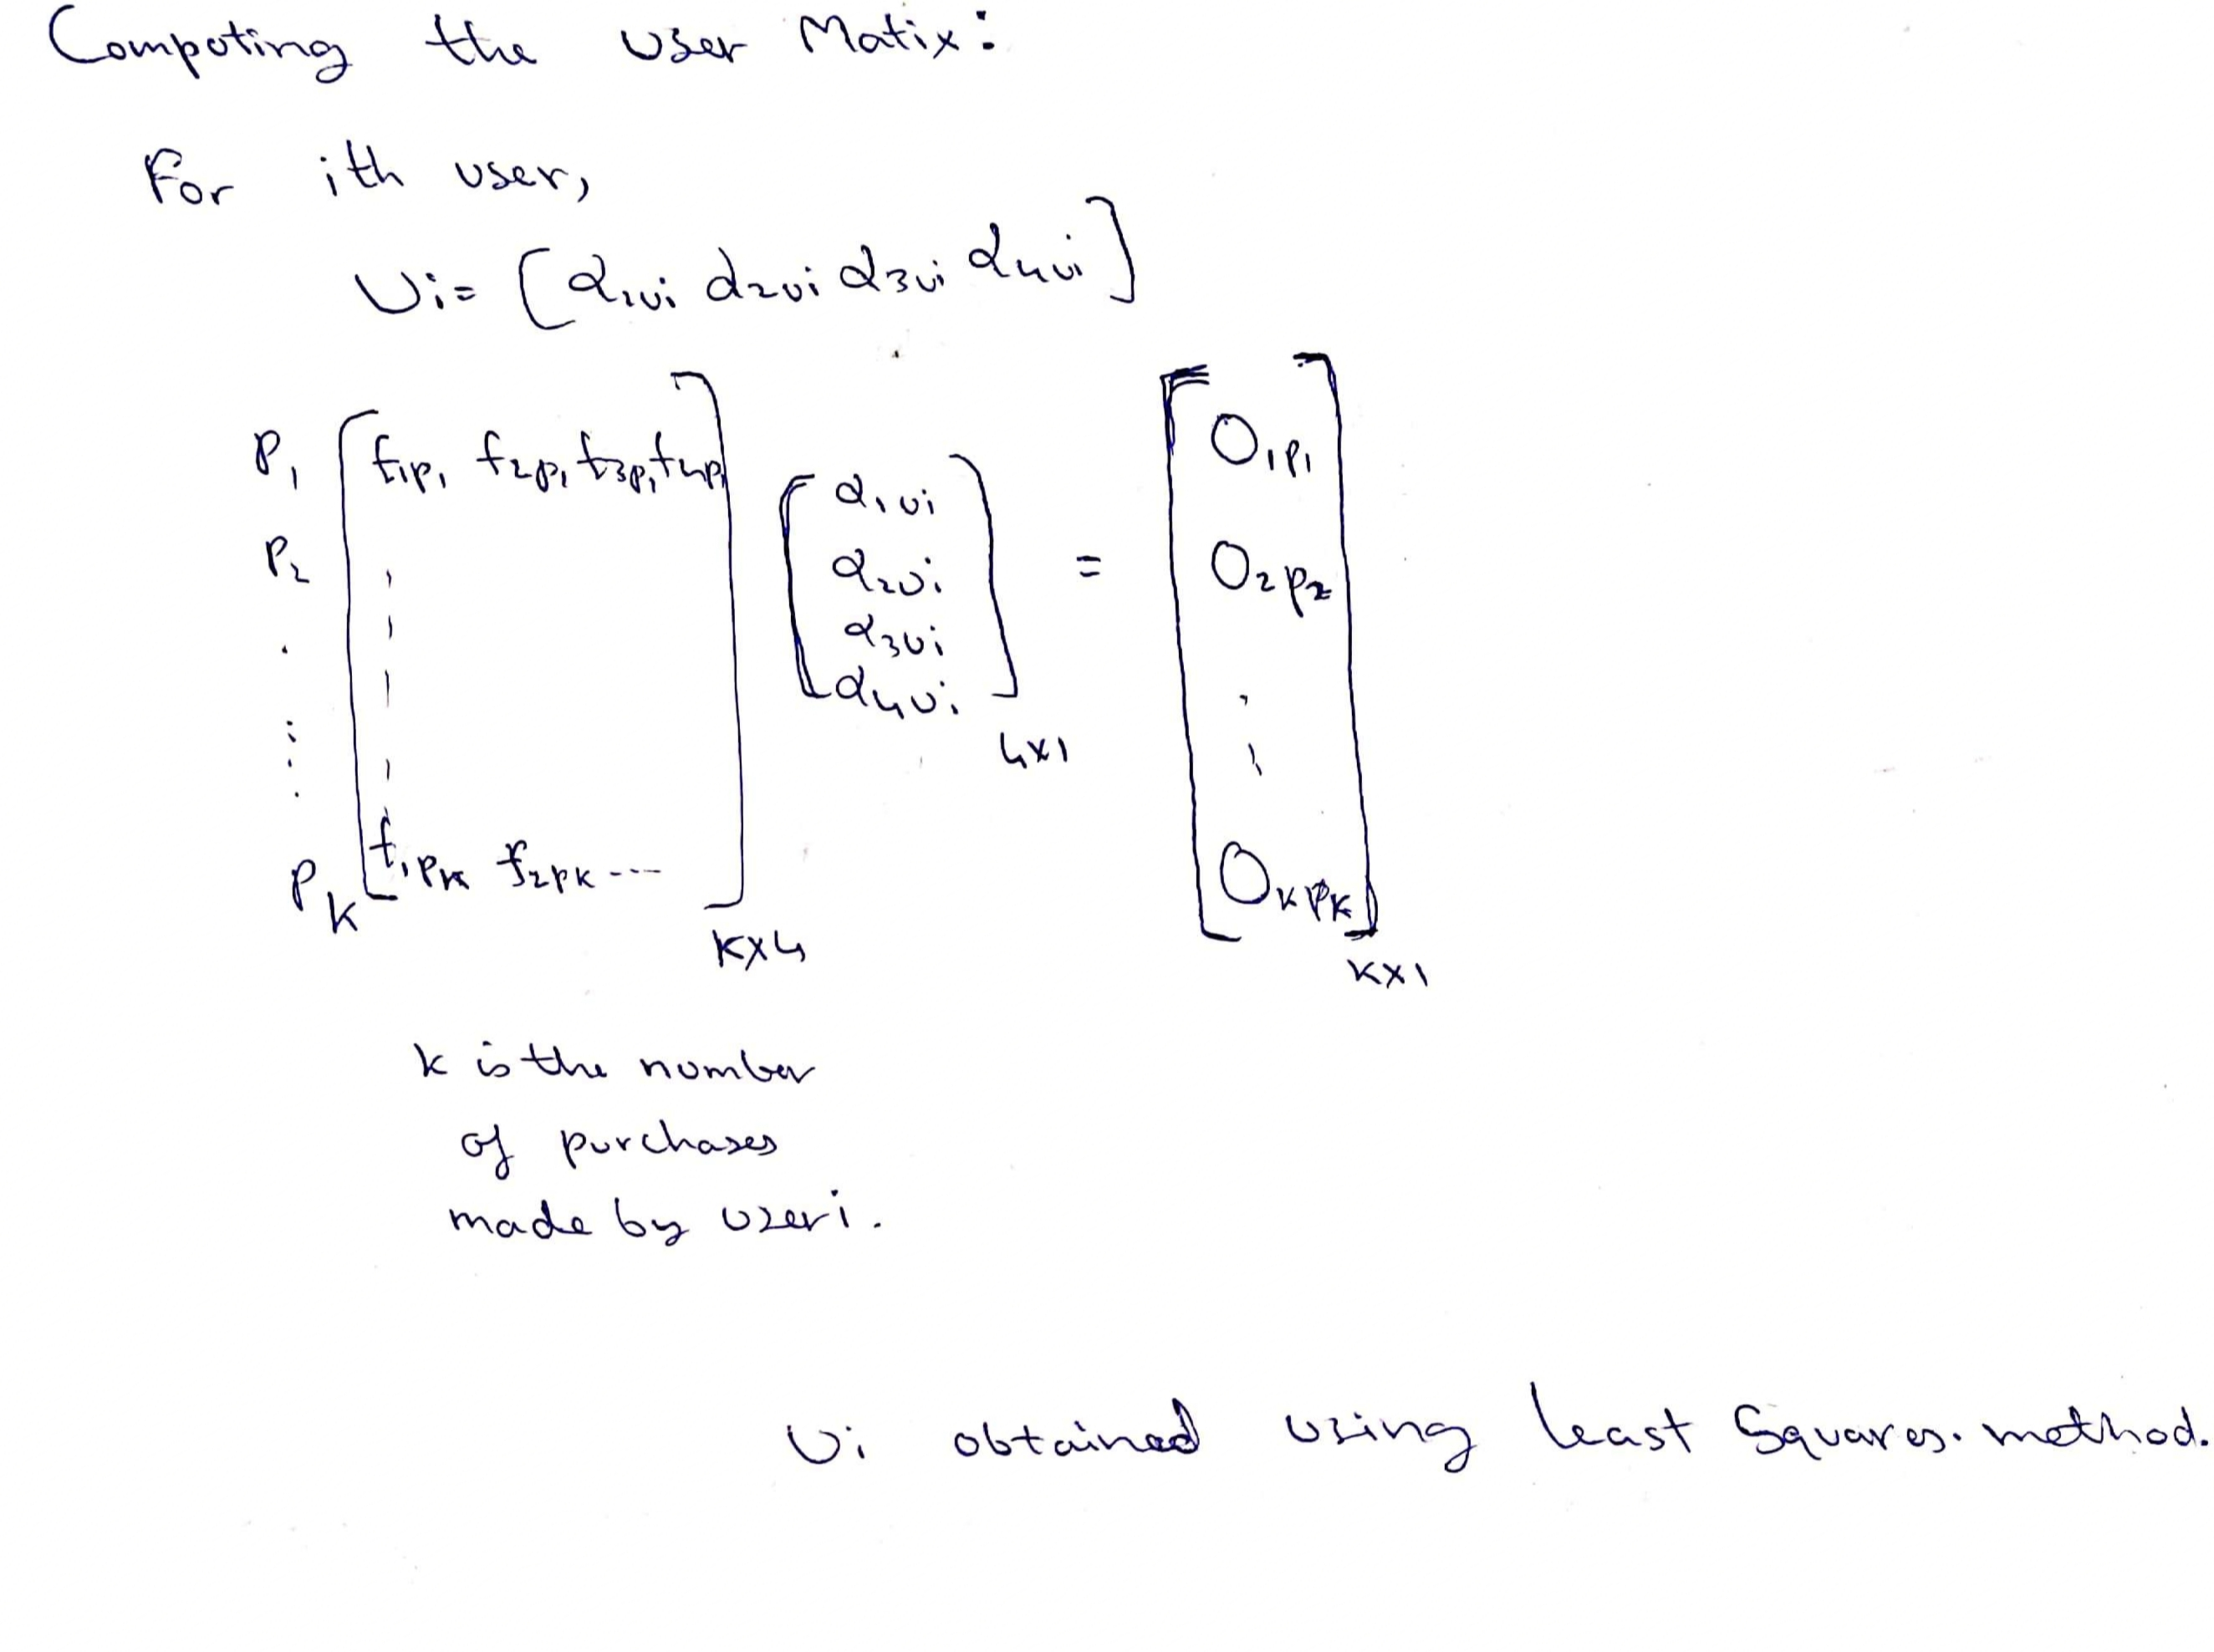

In [21]:
def user_matrix():
    ulist = beeradvocate.user.unique().tolist()
    print(len(ulist))
    u_matrix=[]
    count=1
    for i in ulist:
        df, b, av = user_ratings(i)
        alpha = np.linalg.lstsq(df, b, rcond=None)[0]
        #print(alpha)
        u_matrix.append(np.transpose(alpha)[0])
        if(count%1000==0):
            print(count)
        count=count+1
    return u_matrix


In [22]:
u_matrix = user_matrix()

12429
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [23]:
u_mat_df = pd.DataFrame(u_matrix, columns = ['appearance','aroma','palate','taste'])
#u_mat_df.to_csv('D:/Recommender System Datasets/RS_Project_2/ba_user_matrix.csv')

In [24]:
ulist = beeradvocate.user.unique().tolist()
u_mat_df.insert(0, "user", ulist, True)
#u_mat_df.to_csv('D:/Recommender System Datasets/RS_Project_2/ba_user_matrix2.csv')
u_mat_df.head()

,user,appearance,aroma,palate,taste
0,porter17,-0.229167,0.635417,-1.638021,1.989583
1,Prufrock,0.561626,-0.508727,0.377236,0.600528
2,JohnfromDublin,0.415322,0.257070,0.027475,0.319136
3,Phyl21ca,0.118574,0.326453,0.149656,0.406547
4,SFrankBrew,0.018391,0.312644,0.852874,-0.165517


### Computation of Beer Matrix using the above generated User matrix

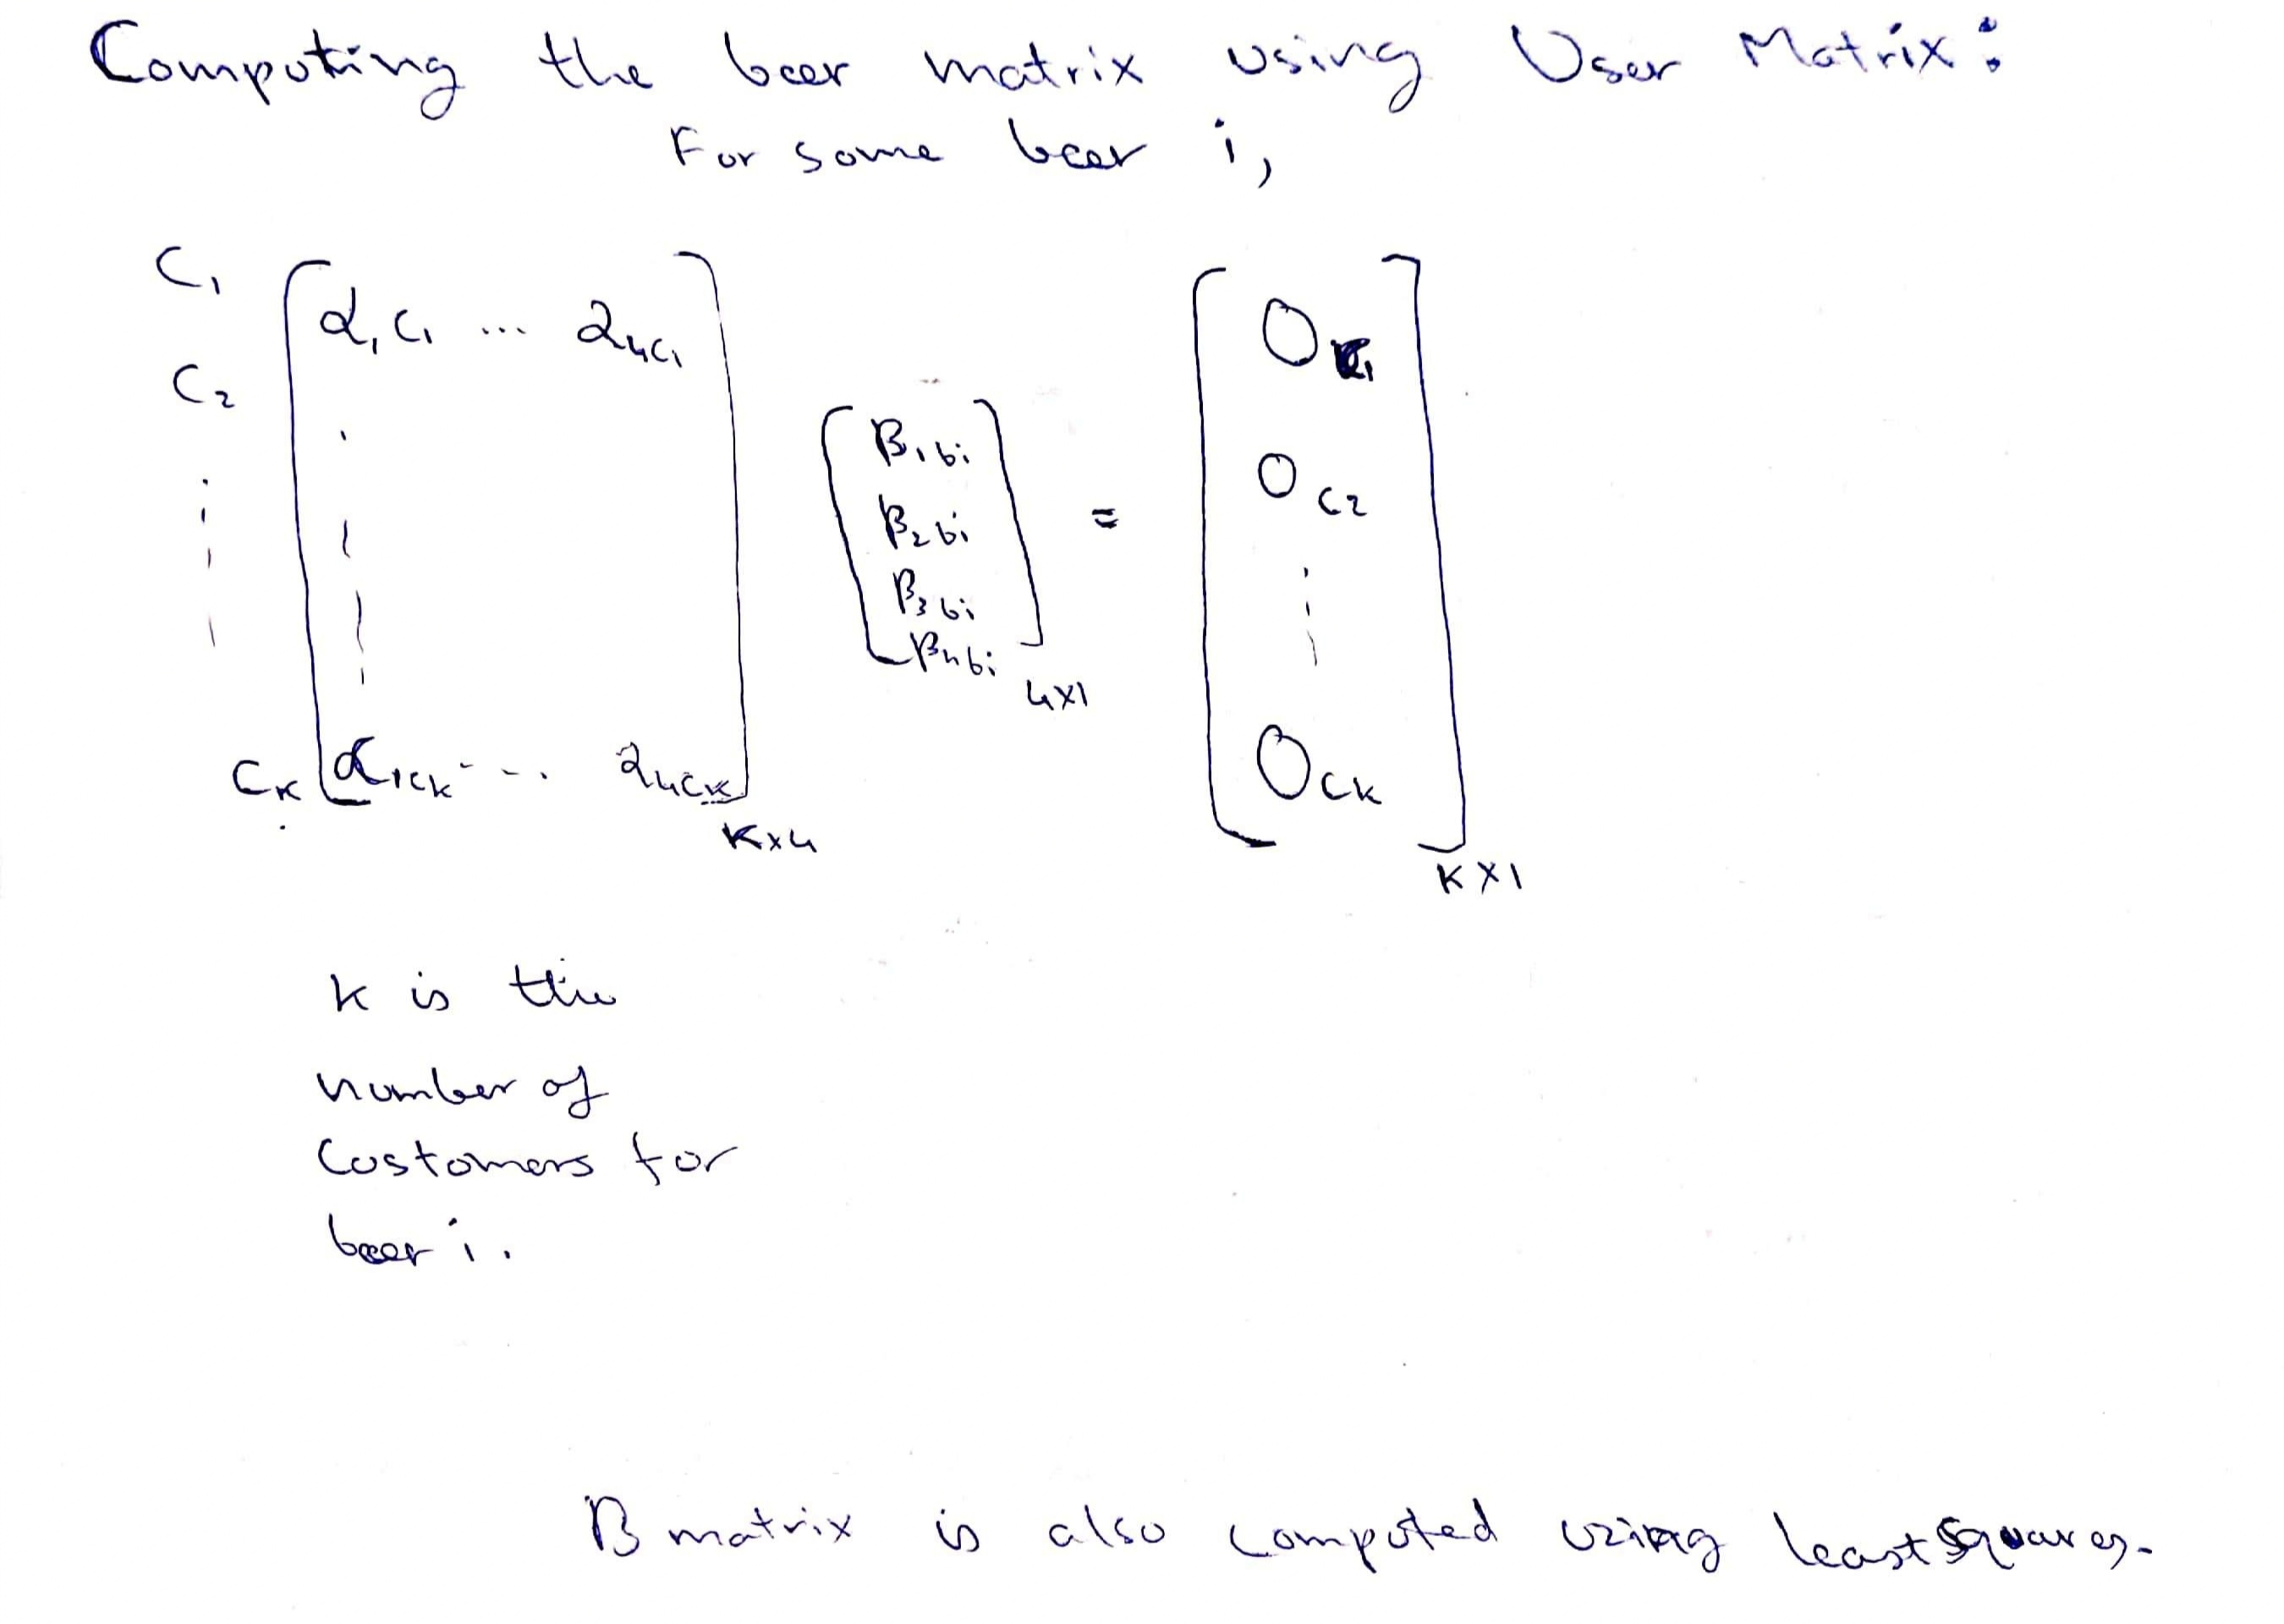

In [25]:
def beer_matrix():
    blist = beeradvocate.beer_name.unique().tolist()
    print(len(blist))
    b_matrix=[]
    count=0
    for beers in blist:
        beer_r = beeradvocate[beeradvocate['beer_name']==beers]
        ub = beeradvocate[beeradvocate['beer_name']==beers]['user'].tolist()
        r=[]
        cst=[]
        cnt=0
        for i in ulist:
            if(i in ub):
                r.append(beer_r[beer_r['user']==i]['overall'].tolist()[0])
                cst.append(u_matrix[cnt])
            cnt=cnt+1
        r=np.array(r)
        #print(r)
        #print(r)
        alp = np.linalg.lstsq(cst, r, rcond=None)[0]
        b_matrix.append(alp)
        if(count%1000==0):
            print(count)
        count=count+1
    return b_matrix 

In [26]:
b_matrix = beer_matrix()

17682
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [27]:
b_mat_df = pd.DataFrame(b_matrix, columns = ['appearance','aroma','palate','taste'])
#b_mat_df.to_csv('D:/Recommender System Datasets/RS_Project_2/ba_beer_matrix.csv')

In [28]:
b_mat_df.shape

(17682, 4)

In [29]:
blist = beeradvocate.beer_name.unique().tolist()
b_mat_df.insert(0, "beer_name", blist, True)
#b_mat_df.to_csv('D:/Recommender System Datasets/RS_Project_2/ba_beer_matrix2.csv')
b_mat_df.head()

,beer_name,appearance,aroma,palate,taste
0,Ybor Gold Brown Ale,-0.129148,0.358091,-0.923111,1.121235
1,Ramstein Winter Wheat,3.680459,3.680202,5.338954,3.441523
2,Young's Special London Ale,4.253609,4.303763,3.812540,4.123164
3,Ravnsborg Rød,4.623540,3.626447,-1.432451,3.646017
4,Weihenstephaner Hefeweissbier,4.145947,4.247324,4.266772,4.589448


### Computation of Rating matrix from user matrix and beer matrix

In [49]:
ra_d = {}
for i in range(10):
    us=u_matrix[i]
    d_in={}
    for j in range(10):
        rat = np.dot(us, b_matrix[j])
        if(rat<0):
            rat=0
        if(rat>5):
            rat=2.5
        d_in[blist[j]] = rat
        
    ra_d[ulist[i]] = d_in

A = pd.DataFrame(ra_d)
        
A

,porter17,Prufrock,JohnfromDublin,Phyl21ca,SFrankBrew,wcudwight,jreitman,francisweizen,WesWes,smcolw
Ybor Gold Brown Ale,4.000000,0.070399,0.370880,0.419272,0.000000,0.348684,0.000000,0.000000,0.190185,0.488242
Ramstein Winter Wheat,0.000000,4.275602,3.719646,3.835967,2.500000,4.033036,4.337314,4.365716,4.303755,3.743635
Young's Special London Ale,3.718256,4.113801,4.293584,4.156173,3.992931,4.140925,4.117249,3.999919,4.095065,4.079927
Ravnsborg Rød,2.500000,2.400993,3.976727,3.000000,0.000000,2.499224,2.169576,1.644221,1.702834,3.116197
Weihenstephaner Hefeweissbier,3.890736,4.533417,4.395649,4.382527,4.283530,4.455843,4.486141,4.292788,4.492321,4.374493
Southern Pecan,4.886347,3.441590,4.135196,4.141942,3.692249,4.037255,3.554201,3.569629,3.922342,3.918478
St Brigid's Blonde Ale,0.000000,4.891303,1.571819,1.168004,1.004536,1.806809,4.000000,2.759955,2.179273,2.296860
Blanche,4.356762,3.195940,3.571462,3.576031,3.115420,3.530761,3.228953,3.152045,3.455891,3.464563
Maudite,3.451329,4.208336,4.187185,4.191964,4.219198,4.243651,4.208681,4.090284,4.279065,4.129145
Sunsplash Golden Ale,2.500000,4.989896,3.047229,3.081409,0.554251,3.484909,4.189940,2.908099,3.536339,4.000000


## Final Recommendations based on input user

In [31]:
def final_rec(user):
    ind=0
    for i in range(len(ulist)):
        if(ulist[i]==user):
            ind=i
            break
    alpha_user = u_matrix[i]
    cat=[]
    #print(b_mat_df.shape[0])
    for i in range(0,b_mat_df.shape[0]):#b_mat_df.shape[0]
        beer_name = b_mat_df.iloc[i]['beer_name']
        alpha_beer = b_mat_df.iloc[i][['appearance','aroma','palate','taste']].tolist()
        #print(alpha_user, alpha_beer)
        rating = np.dot(alpha_user,alpha_beer)
        if(rating<=5 and rating>=0):
            cat.append([beer_name,rating])

    return cat
         

In [32]:
cat = final_rec('Sigmund')

In [33]:
cat[:10]

[['Ybor Gold Brown Ale', 0.40222977052570263],
 ['Ramstein Winter Wheat', 3.9792348293726723],
 ["Young's Special London Ale", 4.186771219994004],
 ['Ravnsborg Rød', 2.8410510002389584],
 ['Weihenstephaner Hefeweissbier', 4.497729453468855],
 ['Southern Pecan', 4.027952618722772],
 ["St Brigid's Blonde Ale", 2.1897118981035772],
 ['Blanche', 3.546617933270908],
 ['Maudite', 4.262361717454022],
 ['Sunsplash Golden Ale', 3.8265970036413055]]

In [34]:
cat.sort(key = lambda x: x[1], reverse=True)

In [35]:
cat[:10]

[['R&D Bourbon Barrel Kriek', 4.999992431597103],
 ["MacStallion's Scotch Ale", 4.998915864842599],
 ['Samuel Adams Oak Aged Porter', 4.998915864842598],
 ['Apache Trout Stout', 4.998753307129175],
 ['MELVIN India Pale Ale', 4.998753307129175],
 ['India Barley Wine', 4.9987008573992675],
 ['King Henry', 4.99578604347373],
 ['Dampf Bier', 4.992867188454989],
 ['Scratch Beer 16 - 2008', 4.991942860503115],
 ['Blue Point Pale Ale', 4.987900128604032]]

In [36]:
cat_df=pd.DataFrame(cat, columns=['beer_name', 'rating'])

In [37]:
cat_df

,beer_name,rating
0,R&D Bourbon Barrel Kriek,4.999992
1,MacStallion's Scotch Ale,4.998916
2,Samuel Adams Oak Aged Porter,4.998916
3,Apache Trout Stout,4.998753
4,MELVIN India Pale Ale,4.998753
...,...,...
17271,Urban Carboys - Brett IPA,0.015658
17272,Rothmooser Hefe-Weißbier,0.015149
17273,Carlsberg Master Brew,0.007650
17274,Black Brutal '07 (JLS Release #23),0.002094


## Evaluation

In [38]:
def evaluation(user):
    cat = final_rec(user)
    cat.sort(key = lambda x: x[1], reverse=True)
    cat_df=pd.DataFrame(cat, columns=['beer_name', 'rating'])
    cl=cat_df['beer_name'].tolist()
    purchases = beer_test[beer_test['user']==user][['beer_name','overall']]
    #print(purchases.shape[0])
    compare=[]
    for i in range(0,purchases.shape[0]):
        p=purchases.iloc[i]
        if(p['beer_name'] in cl):
            ra = p['overall']
            rac = cat_df[cat_df['beer_name']==p['beer_name']]['rating'].tolist()[0]
            compare.append([p['beer_name'],ra,rac])
            
    tp=0
    fn=0
    tn=0
    fp=0
    for i in compare:
        if(i[1]>=3.5 and i[2]<3.5):
            fn=fn+1
        if(i[1]<3.5 and i[2]>=3.5):
            fp=fp+1
        if(i[2]>=3.5 and i[1]>=3.5):
            tp=tp+1
        if(i[2]<3.5 and i[1]<3.5):
            tn=tn+1
    return compare, tp,fn,tn,fp
        
        
    

In [39]:
c, tp, fn, tn, fp = evaluation('stcules')

In [40]:
precision = tp/(tp+fp)
precision

0.625

In [41]:
recall = tp/(tp+fn)
recall

0.6617647058823529

In [42]:
accuracy = (tn+tp)/(tn+tp+fn+fp)
accuracy

0.576271186440678

In [43]:
f1 = 2*precision*recall/(precision+recall)
f1

0.6428571428571429

In [44]:
def full_eval(ul):
    tp, fn, tn, fp = 0,0,0,0
    count=0
    rt = []
    rp = []
    for i in ul:
        print(count, end=", ")
        c, tpi, fni, tni, fpi = evaluation(i)
        c_df = pd.DataFrame(c, columns = ['beer_name','ra','rac'])
        rti = c_df['ra'].tolist()
        rt = rt+rti
        rpi = c_df['rac'].tolist()
        rp = rp+rpi
        tp, fn, tn, fp = tp+tpi, fn+fni, tn+tni, fp+fpi
        count=count+1
    accuracy = (tn+tp)/(tn+tp+fn+fp)
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    f1 = 2*precision*recall/(precision+recall)
    rmse = mse(rt,rp)
    return precision, recall, f1, accuracy, rmse

In [52]:
precision, recall, f1, accuracy, rmse = full_eval(ulist[:100])

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

In [53]:
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 score: ", f1)
print("Accuracy: ", accuracy)
print("Mean Squared Error: ", rmse)

Precision:  0.8832626875930806
Recall:  0.7800485633346823
f1 score:  0.8284532316123141
Accuracy:  0.7317257603764074
Mean Squared Error:  0.7283778361161525


## Novelties/ Contributions

1. Due to multi-aspect ratings Dataset, we have covered all the four aspects of ratings (appearance, taste, aroma, palate) by calculating their respective weights for each of the individual users. 
2. Based on these weights, we have predicted the ratings that were not available.
3. The problem has been formulated as Recommendations as Rating Predictions.
4. We have used five metrics for evaluation namely Precision, Recall and F1-score, MSE, and Accuracy. 
5. Using the approach discussed above we are able to achieve 73.1% accuracy for our proposed design.

**NOTE:** the code has been tested on limited part of datasets (i.e 1 lakh rows) due to computational constraints.

## References

1. Practical Recommendation System by Oreilly book
2. Recommendation System textbook by Charu Aggarwal
3. Recommender Systems Handbook.
4. Online Articles 
5. Learning attitudes and attributes from multi-aspect reviews Julian McAuley, Jure Leskovec, Dan Jurafsky International Conference on Data Mining (ICDM), 2012
6. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews Julian McAuley, Jure Leskovec WWW, 2013